In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import time
import scipy.stats as st
from citipy import citipy
from dotenv import load_dotenv
import os
import seaborn as sns

sns.set()
load_dotenv()

True

# Weather information
## Generate a city list

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [4]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

## Perform API call from OpenWeatherMap

In [6]:
# Load information abou the api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = os.getenv('WEATHER')

In [7]:
# Build partial url
query_url = f"{url}appid={api_key}&units={units}&q="

In [8]:
# Create dataframe and add columns
cities_df = pd.DataFrame({'City':cities})
cities_df['Cloudiness'] = ""
cities_df['Country'] = ""
cities_df['Date'] = ""
cities_df['Humidity'] = ""
cities_df['Lat'] = ""
cities_df['Lng'] = ""
cities_df['Max Temp'] = ""
cities_df['Wind Speed'] = ""

In [9]:
# Use iterrows to iterate through cities dataframe
for index, row in cities_df.iterrows():

    # get restaurant type from df
    city = row['City']

    # assemble url and make API request   
    response = requests.get(query_url+city).json()

    try:     
        cities_df.loc[index,'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index,'Country'] = response['sys']['country']
        cities_df.loc[index,'Date'] = response['dt']
        cities_df.loc[index,'Humidity'] = response['main']['humidity']
        cities_df.loc[index,'Lat'] = response['coord']['lat']
        cities_df.loc[index,'Lng'] = response['coord']['lon']
        cities_df.loc[index,'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index,'Wind Speed'] = response['wind']['speed']
        print(f"Retrived information for country {response['id']} | {response['name']}.")
    
    except (KeyError, IndexError):
        print(f"{city.capitalize()} not found. Skipping.")
        
    print("===================")

Retrived information for country 5924351 | Clyde River.
Retrived information for country 5282297 | Bethel.
Retrived information for country 3386177 | Trairi.
Retrived information for country 2015306 | Tiksi.
Retrived information for country 1214724 | Langsa.
Retrived information for country 3874787 | Punta Arenas.
Retrived information for country 5880054 | Barrow.
Retrived information for country 2729907 | Longyearbyen.
Retrived information for country 2013258 | Vrangel'.
Retrived information for country 4030556 | Rikitea.
Retrived information for country 1806840 | Huilong.
Retrived information for country 964432 | Port Alfred.
Dianopolis not found. Skipping.
Retrived information for country 5106841 | Albany.
Retrived information for country 4032243 | Vaini.
Retrived information for country 2409914 | Bonthe.
Retrived information for country 6201424 | Mataura.
Retrived information for country 3662342 | São Gabriel da Cachoeira.
Retrived information for country 3421719 | Narsaq.
Retrived

## Save results into csv file

In [10]:
cities_df = cities_df.replace('',np.nan)
cities_df = cities_df.dropna(how='any')
cities_df = cities_df.reset_index(drop=True)
cities_df.count()

City          568
Cloudiness    568
Country       568
Date          568
Humidity      568
Lat           568
Lng           568
Max Temp      568
Wind Speed    568
dtype: int64

In [11]:
cities_df.to_csv('Resources/cities.csv')

## Analizing the data
### Arranging the data

In [12]:
#  Change values of cities dataframe to numeric to plot them
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Lng'] = pd.to_numeric(cities_df['Lng'])
cities_df['Max Temp'] = pd.to_numeric(cities_df['Max Temp'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])

### Plotting each vs Latitude

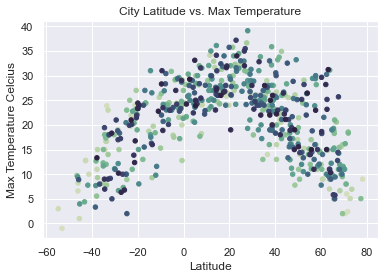

In [13]:
cities_df.plot.scatter(
    x = 'Lat', 
    y = 'Max Temp',
    c = sns.cubehelix_palette(len(cities_df), start=.5, rot=-.75)
)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.savefig('Images/max_temp')
plt.show()

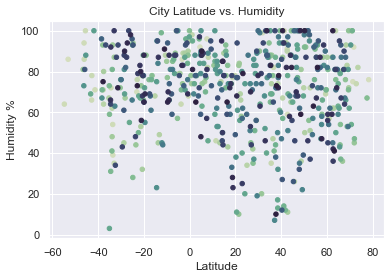

In [14]:
cities_df.plot.scatter(
    x = 'Lat', 
    y = 'Humidity',
    c = sns.cubehelix_palette(len(cities_df), start=.5, rot=-.75)
)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig('Images/humidity')
plt.show()

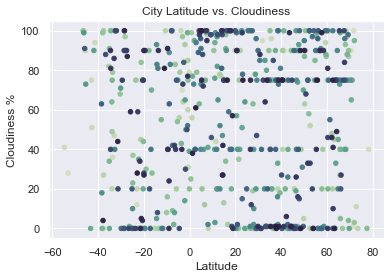

In [15]:
cities_df.plot.scatter(
    x = 'Lat', 
    y = 'Cloudiness',
    c = sns.cubehelix_palette(len(cities_df), start=.5, rot=-.75)
)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.savefig('Images/clouds')
plt.show()

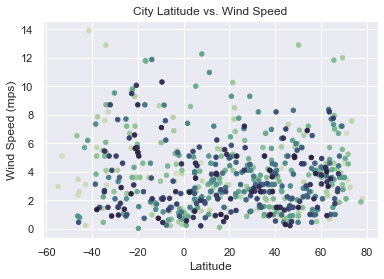

In [16]:
cities_df.plot.scatter(
    x = 'Lat', 
    y = 'Wind Speed',
    c = sns.cubehelix_palette(len(cities_df), start=.5, rot=-.75)
)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.savefig('Images/wind_speed')
plt.show()

### Plotting South Hemispher

In [17]:
# Separe the the south hemisphere
south = cities_df.loc[cities_df['Lat'] < 0]

The r-squared is: 0.724


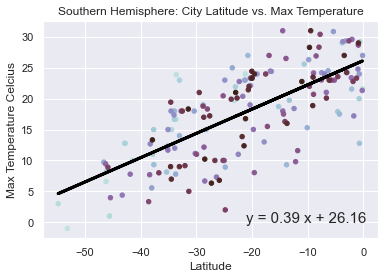

In [18]:
linear_regression = st.linregress(south['Lat'], south['Max Temp'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',
    c = sns.cubehelix_palette(len(south), start=1.4, rot=-.8)
)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.annotate(line_eq,(-21,0), fontsize=15)
plt.savefig('Images/south-max_temp')
plt.show()

The r-squared is: 0.173


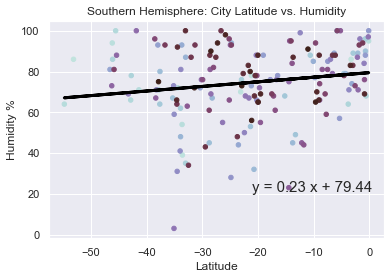

In [19]:
linear_regression = st.linregress(south['Lat'], south['Humidity'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Humidity',
    c = sns.cubehelix_palette(len(south), start=1.4, rot=-.8)
)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(-21,21), fontsize=15)
plt.savefig('Images/south-humidity')
plt.show()

The r-squared is: -0.081


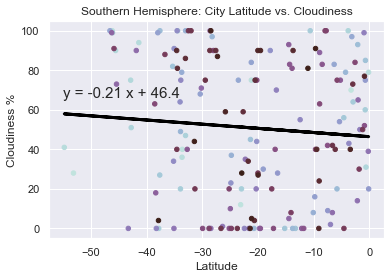

In [20]:
linear_regression = st.linregress(south['Lat'], south['Cloudiness'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',
    c = sns.cubehelix_palette(len(south), start=1.4, rot=-.8)
)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(-55,66), fontsize=15)
plt.savefig('Images/south-clouds')
plt.show()

The r-squared is: -0.148


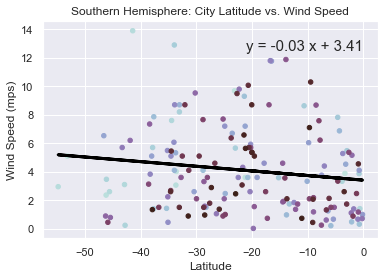

In [21]:
linear_regression = st.linregress(south['Lat'], south['Wind Speed'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',
    c = sns.cubehelix_palette(len(south), start=1.4, rot=-.8)
)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.annotate(line_eq,(-21,12.5), fontsize = 15)
plt.savefig('Images/south-wind_speed')
plt.show()

### Plotting North Hemispher

In [22]:
north = cities_df.loc[cities_df['Lat'] >= 0]

The r-squared is: -0.666


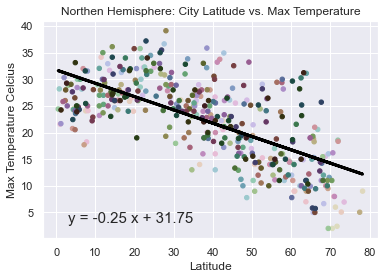

In [23]:
linear_regression = st.linregress(north['Lat'], north['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',
    c = sns.cubehelix_palette(len(north), start = 1.2, rot = 6)
)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.annotate(line_eq,(3,3),fontsize=15)
plt.savefig('Images/north-max_temp')
plt.show()

The r-squared is: -0.018


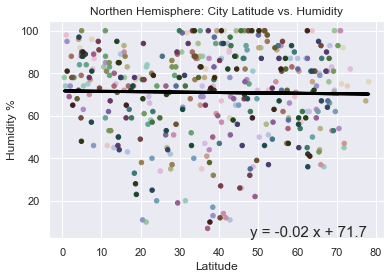

In [24]:
linear_regression = st.linregress(north['Lat'], north['Humidity'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Humidity',
    c = sns.cubehelix_palette(len(north), start = 1.2, rot = 6)
)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.annotate(line_eq,(48,3),fontsize=15)
plt.savefig('Images/north-humidity')
plt.show()

The r-squared is: -0.107


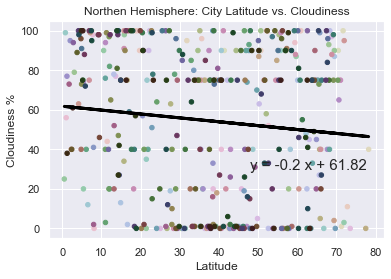

In [25]:
linear_regression = st.linregress(north['Lat'], north['Cloudiness'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',
    c = sns.cubehelix_palette(len(north), start = 1.2, rot = 6)
)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.annotate(line_eq,(48,30),fontsize=15)
plt.savefig('Images/north-clouds')
plt.show()

The r-squared is: 0.084


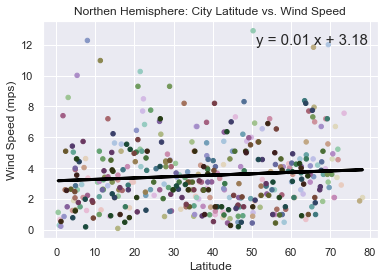

In [26]:
linear_regression = st.linregress(north['Lat'], north['Wind Speed'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',
    c = sns.cubehelix_palette(len(north), start = 1.2, rot = 6)
)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black'
)
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.annotate(line_eq,(51,12),fontsize=15)
plt.savefig('Images/north-wind_speed')
plt.show()

# Vacation Information

In [27]:
# Load the csv generated before
cities_df = pd.read_csv("Resources/cities.csv")
cities_df = cities_df.drop(columns='Unnamed: 0')

In [28]:
# Get gmaps with key
gmaps.configure(api_key = os.getenv('KEY'))

In [29]:
# Heatmap with Humidity as weights for each city
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(
    cities_df[["Lat", "Lng"]], 
    weights = cities_df['Humidity'], 
    dissipating = False, 
    max_intensity = 100, 
    point_radius = 1
)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
# Define an ideal weather (not too hot nor cool, with somewind and clouds)
ideal_weather = cities_df\
    .loc[cities_df['Max Temp'] < 30]\
    .loc[cities_df['Max Temp'] > 10]\
    .loc[cities_df['Wind Speed'] > 8]\
    .loc[cities_df['Cloudiness'] > 20]

In [31]:
ideal_weather['Lat'] = pd.to_numeric(ideal_weather['Lat'])
ideal_weather['Lng'] = pd.to_numeric(ideal_weather['Lng'])

In [32]:
hotel_df = ideal_weather.copy()
hotel_df['Hotel Name'] = ""

In [33]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {
    "type":"lodging",
    "key":os.getenv('KEY'),
    "radius":"5000"
}

In [34]:
for index, row in hotel_df.iterrows():

    lat = row['Lat']
    lng = row['Lng']
    params['location'] = f'{lat}, {lng}'

    print(f"Retrieving Results for: {row['City']}.")
    response = requests.get(base_url, params=params).json()
    results = response['results']
    # print(response)

    try:
        print(f"Closest hotel is {results[0]['name']}.")  
        hotel_df.loc[index, 'Hotel Name'] = results[0]['name']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")

Retrieving Results for: east london.
Closest hotel is Tu Casa.
------------
Retrieving Results for: samarai.
Closest hotel is Nuli Sapi.
------------
Retrieving Results for: saint-philippe.
Closest hotel is Chambres d'hôte "La Trinité".
------------
Retrieving Results for: talnakh.
Closest hotel is Talnakh Hotel.
------------
Retrieving Results for: saldanha.
Closest hotel is Blue Bay Lodge.
------------
Retrieving Results for: cockburn town.
Closest hotel is Osprey Beach Hotel.
------------
Retrieving Results for: swift current.
Closest hotel is Motel 6 Swift Current, SK.
------------
Retrieving Results for: butaritari.
Closest hotel is Isles Sunset Lodge.
------------
Retrieving Results for: faanui.
Closest hotel is Bora-Bora Pearl Beach Resort & Spa.
------------
Retrieving Results for: krasnoselkup.
Closest hotel is Krasnosel'kupnefteprodukt.
------------
Retrieving Results for: esperance.
Closest hotel is Hospitality Esperance.
------------
Retrieving Results for: fare.
Closest ho

In [35]:
# Add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [36]:
hotel_layer = gmaps.symbol_layer(
    locations, 
    fill_color = 'rgba(0, 150, 0, 0.4)', 
    stroke_color = 'rgba(0, 0, 150, 0.4)', 
    scale = 2, 
    info_box_content = hotel_info
)

In [37]:
# Add marker layer ontop of heat map
fig = gmaps.figure()
fig.add_layer(heat_layer)
fig.add_layer(hotel_layer)

In [38]:
fig

Figure(layout=FigureLayout(height='420px'))